**TO DO**

https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571

https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-Packages" data-toc-modified-id="Load-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Packages</a></span></li><li><span><a href="#User-Timeline-Tweet-Data" data-toc-modified-id="User-Timeline-Tweet-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>User Timeline Tweet Data</a></span><ul class="toc-item"><li><span><a href="#Load-User-Timeline-Data" data-toc-modified-id="Load-User-Timeline-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load User Timeline Data</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#@albertheijn" data-toc-modified-id="@albertheijn-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>@albertheijn</a></span></li><li><span><a href="#@JumboSupermarkten" data-toc-modified-id="@JumboSupermarkten-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>@JumboSupermarkten</a></span></li><li><span><a href="#@picnic" data-toc-modified-id="@picnic-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>@picnic</a></span></li></ul></li><li><span><a href="#Selecting-features" data-toc-modified-id="Selecting-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Selecting features</a></span></li><li><span><a href="#Concatenating-Data-within-period-March-30th-and-June-24th" data-toc-modified-id="Concatenating-Data-within-period-March-30th-and-June-24th-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Concatenating Data within period March 30th and June 24th</a></span><ul class="toc-item"><li><span><a href="#Cleaning-hashtags-and-source-info" data-toc-modified-id="Cleaning-hashtags-and-source-info-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Cleaning hashtags and source info</a></span></li></ul></li><li><span><a href="#Analysing-Language-of-all-Tweets" data-toc-modified-id="Analysing-Language-of-all-Tweets-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Analysing Language of all Tweets</a></span></li><li><span><a href="#Cleaning-Tweets" data-toc-modified-id="Cleaning-Tweets-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Cleaning Tweets</a></span></li></ul></li><li><span><a href="#Calculating-Sentiment" data-toc-modified-id="Calculating-Sentiment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculating Sentiment</a></span></li></ul></div>

**TO ADAPT AND INSERT SOMEWHERE**

attributes are the following:

text: the text of the tweet itself

created_at: the date of creation

favorite_count, retweet_count: the number of favourites and retweets

favorited, retweeted: boolean stating whether the authenticated user (you) have favourited or retweeted this tweet

lang: acronym for the language (e.g. “en” for english)

id: the tweet identifier

We can imagine how these data already allow for some interesting analysis: we can check who is most favourited/retweeted, who’s discussing with who, what are the most popular hashtags and so on. Most of the goodness we’re looking for, i.e. the content of a tweet, is anyway embedded in the text, and that’s where we’re starting our analysis.

**MY GOAL**

1. Cleaning
    Clean text without tokenize (at least no using a tokenizer) neither remove stop words.
    
    Complement my function checking :
    
    http://localhost:8889/notebooks/Project_Twitter/planing%20twitter%20project.ipynb
    
    https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
    
    


and create 2 columns:

sentiment_score: 

sentiment: neg (<0), pos (>0), neutral (0)

In some vizualizations groupby supermarkt, sentiment and then:

- check most frequent words : pos and negative
- check timeline of the 3 supermarkts pos and neg
- Build Word Cloud using mask (tokenize and remove stop words)

- tokenize using split() - dividing by space and use the dutch stopwords because 
"It must be trained on a large collection of plaintext in the target language before it can be used." https://www.nltk.org/api/nltk.tokenize.html



# Introduction

The goal here is to perform some EDA and Sentiment Analysis to infer how user of online supermarkets feel towards these supermarkets in the period from March 30th, 2020 and June 24th, 2020. This period does not cover all period considering the 1st corona case in The Netherlands (February 27th) but as seen in the following graph still covers an important period of the crisis.

![corona cases from 27022020 until 25062020](../images/graph_corona_cases_nl_270220_250620.jpg)
source: https://www.rivm.nl/coronavirus-covid-19/grafieken

Our analysis separated in two parts:

1. **[User timeline data](#User-Timeline-Tweet-Data)** 
2. Search data

The following actions are taken in order to achieve our goal.

1. **[Load data](#Load-User-Timeline-Data)**
2. **[Select interesting features for our analysis](#Pre-processing)**
3. **[Concatenate data](#Concatenating-Data-within-period-March-30th-and-June-24th)**
4. **[Perform analysis over languages present in our data and decide how to deal with it](#Analysing-Language-of-all-Tweets)**
5. **[Clean text for sentiment analysis](#Cleaning-Tweets)**
6. **[Create features that measure sentiment](#Calculating-Sentiment)**

In [57]:
"Analysing Language of all Tweets".replace(" ","-")

'Analysing-Language-of-all-Tweets'

# Load Packages

In [73]:
# import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import ast 
import lxml.html
import re
import unicodedata
from bs4 import BeautifulSoup
import string
import unicodedata
from unidecode import unidecode
from bs4 import BeautifulSoup
from html import unescape
import spacy # fast NLP
# import spacy module for Dutch language
nlp_nl = spacy.load('nl_core_news_sm')
from textblob import TextBlob
from textblob_nl import PatternAnalyzer
    


TodaysDate = time.strftime("%Y-%m-%d")

# User Timeline Tweet Data

In this section we handle Tweets collected from @picnic, @JumboSupermarkt, @albertijn in the period that goes from `March 30th, 2020` until `June 24th, 2020`.

## Load User Timeline Data

In [3]:
# loading the combined data of AH (retrieved 16/06 and 24/06) 

df_ah = pd.read_csv("../data/processed/AH_concat_16_and_24_June_2020-06-26.csv")

# loading the most recent data

df_jumbo = pd.read_csv("../data/tweets/JumboSupermarkt_2020-06-24-17-08.csv")

df_picnic = pd.read_csv("../data/tweets/picnic_2020-06-24-17-06.csv")

## Pre-processing 

This includes basically setting data from @JumboSupermarketen and @picnic in the same timeline as @ah and select interesting features for our analysis.

### @albertheijn

In [4]:
df_ah.head(2)

,mined_at,screen_name,tweet_id,tweet_id_str,created_at,year,month,day,day_of_week,hour,...,retweet_count,source,text,language,favorite_count,hashtags,urls,user_favourites_count,followers_count,friends_count
0,2020-06-16 21:58:04.280117,albertheijn,1244535843135672326,1244535843135672326,2020-03-30 08:04:02+00:00,2020,3,30,0,8,...,0,"<a href=""https://www.tracebuzz.com"" rel=""nofol...","@derots Voorraad is er genoeg, het is voor ons...",nl,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-16 21:58:04.280117,albertheijn,1244538454890987523,1244538454890987523,2020-03-30 08:14:24+00:00,2020,3,30,0,8,...,0,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",@MoniquevDBurgh We doen er alles aan om zoveel...,nl,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_ah.tail(2)

,mined_at,screen_name,tweet_id,tweet_id_str,created_at,year,month,day,day_of_week,hour,...,retweet_count,source,text,language,favorite_count,hashtags,urls,user_favourites_count,followers_count,friends_count
3480,2020-06-24 17:10:38.375439,albertheijn,1275800040687239170,1275800040687239170,2020-06-24 14:36:47+00:00,2020,6,24,2,14,...,0,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",@marzman95 Hi! Je kan deze zegels combineren. ...,nl,NaN,[],[],580.0,45540.0,6.0
3481,2020-06-24 17:10:38.375439,albertheijn,1275807617395372034,1275807617395372034,2020-06-24 15:06:54+00:00,2020,6,24,2,15,...,0,"<a href=""https://www.tracebuzz.com"" rel=""nofol...","@Tiezzymeister Hi, ik heb even voor je gekeken...",nl,NaN,[],[],580.0,45540.0,6.0


In [6]:
df_ah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mined_at               3482 non-null   object 
 1   screen_name            3482 non-null   object 
 2   tweet_id               3482 non-null   int64  
 3   tweet_id_str           3482 non-null   int64  
 4   created_at             3482 non-null   object 
 5   year                   3482 non-null   int64  
 6   month                  3482 non-null   int64  
 7   day                    3482 non-null   int64  
 8   day_of_week            3482 non-null   int64  
 9   hour                   3482 non-null   int64  
 10  minute                 3482 non-null   int64  
 11  retweet_count          3482 non-null   int64  
 12  source                 3482 non-null   object 
 13  text                   3482 non-null   object 
 14  language               3482 non-null   object 
 15  favo

### @JumboSupermarkten

In [7]:
df_jumbo.head(2)

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,...,retweet_count,favorite_count,source,hashtags,urls,language,user_favourites_count,followers_count,friends_count,text
0,2020-06-24 17:08:19.104773,2020-03-10 07:06:47+00:00,2020,3,10,1,7,6,JumboSupermarkt,1237273680134144000,...,0,NaN,"<a href=""http://www.salesforce.com"" rel=""nofol...",[],[],nl,3767,16208,1710,"@liefsliss Hallo,dank je wel voor je oplettend..."
1,2020-06-24 17:08:19.104773,2020-03-10 07:07:30+00:00,2020,3,10,1,7,7,JumboSupermarkt,1237273859163926529,...,0,NaN,"<a href=""http://www.salesforce.com"" rel=""nofol...",[],[],nl,3767,16208,1710,@brtlvrs Je kunt niet sparen op actieproducten...


In [8]:
df_jumbo.tail(2)

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,...,retweet_count,favorite_count,source,hashtags,urls,language,user_favourites_count,followers_count,friends_count,text
3236,2020-06-24 17:08:14.385115,2020-06-24 13:04:43+00:00,2020,6,24,2,13,4,JumboSupermarkt,1275776871951728640,...,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[{'text': 'hallojumbo'}],[{'expanded_url': 'https://nieuws.jumbo.com/pe...,nl,3767,16208,1710,Jumbo België opent vierde winkel in Vlaanderen...
3237,2020-06-24 17:08:14.385115,2020-06-24 13:56:42+00:00,2020,6,24,2,13,56,JumboSupermarkt,1275789954862514177,...,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[],[],nl,3767,16208,1710,"@jaantje75 Hallo, we zien dat je bericht er tu..."


In [9]:
df_jumbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mined_at               3238 non-null   object 
 1   created_at             3238 non-null   object 
 2   year                   3238 non-null   int64  
 3   month                  3238 non-null   int64  
 4   day                    3238 non-null   int64  
 5   day_of_week            3238 non-null   int64  
 6   hour                   3238 non-null   int64  
 7   minute                 3238 non-null   int64  
 8   screen_name            3238 non-null   object 
 9   tweet_id               3238 non-null   int64  
 10  tweet_id_str           3238 non-null   int64  
 11  retweet_count          3238 non-null   int64  
 12  favorite_count         15 non-null     float64
 13  source                 3238 non-null   object 
 14  hashtags               3238 non-null   object 
 15  urls

### @picnic

In [10]:
df_picnic.head(2)

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,...,retweet_count,favorite_count,source,hashtags,urls,language,user_favourites_count,followers_count,friends_count,text
0,2020-06-24 17:06:50.798338,2018-12-07 15:06:19+00:00,2018,12,7,4,15,6,picnic,1071058330003623936,...,0,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],nl,3885,4842,5,@MiriamKrooswijk Spannend Miriam! Laat ons eve...
1,2020-06-24 17:06:50.798338,2018-12-07 15:24:06+00:00,2018,12,7,4,15,24,picnic,1071062804998877184,...,0,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],nl,3885,4842,5,@MiriamKrooswijk Dat is balen zeg Miriam. Wij ...


In [11]:
df_picnic.tail(2)

,mined_at,created_at,year,month,day,day_of_week,hour,minute,screen_name,tweet_id,...,retweet_count,favorite_count,source,hashtags,urls,language,user_favourites_count,followers_count,friends_count,text
3227,2020-06-24 17:06:45.034704,2020-06-24 08:12:09+00:00,2020,6,24,2,8,12,picnic,1275703244707319808,...,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[],[],nl,3885,4842,5,@Wouter_Kamp Door de coronacrisis stond de wac...
3228,2020-06-24 17:06:45.034704,2020-06-24 14:34:45+00:00,2020,6,24,2,14,34,picnic,1275799526717247493,...,0,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[],[],nl,3885,4842,5,@RuudVeHa Ik stuur je even een privébericht zo...


In [12]:
df_picnic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mined_at               3229 non-null   object 
 1   created_at             3229 non-null   object 
 2   year                   3229 non-null   int64  
 3   month                  3229 non-null   int64  
 4   day                    3229 non-null   int64  
 5   day_of_week            3229 non-null   int64  
 6   hour                   3229 non-null   int64  
 7   minute                 3229 non-null   int64  
 8   screen_name            3229 non-null   object 
 9   tweet_id               3229 non-null   int64  
 10  tweet_id_str           3229 non-null   int64  
 11  retweet_count          3229 non-null   int64  
 12  favorite_count         49 non-null     float64
 13  source                 3229 non-null   object 
 14  hashtags               3229 non-null   object 
 15  urls

## Selecting features

A quick look reveals that everything seems fine. We need now to put all three datasets in the same time period and keep the selected columns. 

From the 20 features we selected for our analysis:

1. `created_at`: The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change.
2. `screen_name`:  account’s Twitter handle (e.g. @albertijn without @)
3. `user_favourites_count`: The number of Tweets this user has liked in the account’s lifetime
5. `followers_count`: The number of Tweets this user has liked in the account’s lifetime. 
6. `friends_count`: The number of users this account is following (AKA their “followings”)
7. `retweet_count`: number of times the tweet was retweeted
8. `hashtags`: the hashtags (e.g. "#space" appears as "space") included in the tweet
9. `source`: from what platform/app the tweet was posted
10. `language`: language used in the Tweet
11. `text`:the text included in the tweet      

Some of the definitions were taken from [here](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object).

`favorite_count` could be interesting but most of the time we don't have the information so I didn't include it.

In [13]:
selected_features = ['created_at','screen_name', 'user_favourites_count', 'followers_count',
       'friends_count', 'retweet_count', 'hashtags', 'source','language','text']

In [14]:
# transforming 'create_at' in datetime type

df_ah['created_at'] = pd.to_datetime(df_ah['created_at'], infer_datetime_format=True)
df_jumbo['created_at'] = pd.to_datetime(df_jumbo['created_at'], infer_datetime_format=True)
df_picnic['created_at'] = pd.to_datetime(df_picnic['created_at'], infer_datetime_format=True)

# selecting features

df_ah = df_ah[selected_features]
df_jumbo = df_jumbo[selected_features]
df_picnic = df_picnic[selected_features]

In [15]:
# min date to all data
min_date = min(df_ah['created_at'])
min_date

Timestamp('2020-03-30 08:04:02+0000', tz='UTC')

## Concatenating Data within period March 30th and June 24th

In [16]:
df_concat = pd.concat([df_picnic[df_picnic['created_at']>=min_date],df_jumbo[df_jumbo['created_at']>=min_date], df_ah])

df_concat.sort_values(by="created_at",inplace = True)

# setting created_at as index
df_concat.set_index('created_at', inplace=True)

df_concat.head()

,screen_name,user_favourites_count,followers_count,friends_count,retweet_count,hashtags,source,language,text
created_at,,,,,,,,,
2020-03-30 08:04:02+00:00,albertheijn,NaN,NaN,NaN,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,"@derots Voorraad is er genoeg, het is voor ons..."
2020-03-30 08:14:24+00:00,albertheijn,NaN,NaN,NaN,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,@MoniquevDBurgh We doen er alles aan om zoveel...
2020-03-30 08:23:12+00:00,albertheijn,NaN,NaN,NaN,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,@AnnekeVisser15 Klopt! De Persoonlijke Bonus w...
2020-03-30 08:26:12+00:00,albertheijn,NaN,NaN,NaN,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,@waltervantiel We kopen groenten en fruit z...
2020-03-30 08:30:44+00:00,albertheijn,NaN,NaN,NaN,0,NaN,"<a href=""https://www.tracebuzz.com"" rel=""nofol...",nl,@bbstring Je kunt ons het beste een privéberic...


In [17]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6239 entries, 2020-03-30 08:04:02+00:00 to 2020-06-24 15:06:54+00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_name            6239 non-null   object 
 1   user_favourites_count  5984 non-null   float64
 2   followers_count        5984 non-null   float64
 3   friends_count          5984 non-null   float64
 4   retweet_count          6239 non-null   int64  
 5   hashtags               5984 non-null   object 
 6   source                 6239 non-null   object 
 7   language               6239 non-null   object 
 8   text                   6239 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 487.4+ KB


### Cleaning hashtags and source info

In [18]:
df_concat.hashtags.value_counts()

[]                                                            5976
[{'text': 'hallojumbo'}, {'text': 'zozorgenwevoorelkaar'}]       1
[{'text': 'datishetlekkerevanalbertheijn'}]                      1
[{'text': 'Ahhaaaa'}]                                            1
[{'text': 'hallojumbo'}]                                         1
[{'text': 'thuiswerken'}]                                        1
[{'text': 'albertheijn'}, {'text': 'gezondeten'}]                1
[{'text': 'Beedeals'}, {'text': 'wereldbijendag'}]               1
[{'text': 'IkKipditniet'}]                                       1
Name: hashtags, dtype: int64

In [19]:
df_concat.source.value_counts()

<a href="https://www.tracebuzz.com" rel="nofollow">Tracebuzz</a>                       3000
<a href="http://www.salesforce.com" rel="nofollow">Salesforce - Social Studio</a>      2171
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 943
<a href="http://www.zendesk.com" rel="nofollow">Zendesk</a>                             112
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      13
Name: source, dtype: int64

As we can see `source` and `hashtag` need some cleaning to improve readability.

In [20]:
def clean_hashtags(hashtags):
    """
    Turns data with any number of hashtags like this - "[{'text': 'thuiswerken'}]" - to a list like this -
    ['thuiswerken']
    """
    
    cleaned = []
    
    # there are some na hashtags seem as 'float' that are not accepted by 'literal_eval'
    if type(hashtags) == str:
        
        # hashtags originaly are of type string in my dataframe, I need it to be list for my solution to work
        hashtags = ast.literal_eval(hashtags) 
    
        if len(hashtags) >= 1:
            for i in range(len(hashtags)):
                cleaned.append(hashtags[i]['text'])
        
    return ', '.join(cleaned)

def clean_source(source):
    """
    Extracts the source from something like '<a href="https://www.tracebuzz.com" rel="nofollow">Tracebuzz</a>', i.e.,
    returns Tracebuzz
    """
    raw = lxml.html.document_fromstring(source)
    return raw.cssselect('body')[0].text_content()


In [21]:
hashtags = df_concat[(df_concat['hashtags']!='[]') & (df_concat['hashtags'].notnull())].iloc[2]['hashtags']
hashtags

"[{'text': 'albertheijn'}, {'text': 'gezondeten'}]"

In [22]:
clean_hashtags(hashtags)

'albertheijn, gezondeten'

In [23]:
source = df_concat[(df_concat['hashtags']!='[]') & (df_concat['hashtags'].notnull())].iloc[2]['source']
source

'<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>'

In [24]:
clean_source(source)

'Twitter Web App'

In [25]:
# cleaning all hashtags and source

df_concat['hashtags'] = df_concat['hashtags'].apply(clean_hashtags)
df_concat['source'] = df_concat['source'].apply(clean_source)

In [26]:
df_concat['hashtags'].value_counts()

                                    6231
Ahhaaaa                                1
hallojumbo                             1
albertheijn, gezondeten                1
datishetlekkerevanalbertheijn          1
Beedeals, wereldbijendag               1
thuiswerken                            1
hallojumbo, zozorgenwevoorelkaar       1
IkKipditniet                           1
Name: hashtags, dtype: int64

In [27]:
# save data before eliminating languages

df_concat.to_csv("../data/processed/tweets_300320_240620_selected_features_all_languages_"+TodaysDate+".csv", index = False)

## Analysing Language of all Tweets

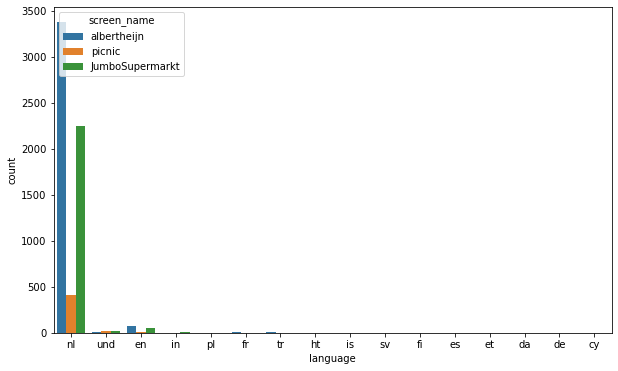

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data = df_concat, x='language', hue = 'screen_name' )

In [29]:
df_concat.groupby('screen_name')['language'].value_counts(normalize=True)

screen_name      language
JumboSupermarkt  nl          0.968925
                 en          0.020285
                 und         0.007769
                 in          0.001726
                 de          0.000863
                 da          0.000432
albertheijn      nl          0.969558
                 en          0.021827
                 und         0.001723
                 fr          0.001436
                 tr          0.001149
                 et          0.000862
                 da          0.000574
                 in          0.000574
                 cy          0.000287
                 de          0.000287
                 es          0.000287
                 fi          0.000287
                 ht          0.000287
                 is          0.000287
                 pl          0.000287
                 sv          0.000287
picnic           nl          0.938636
                 und         0.040909
                 en          0.015909
                 es     

As we can see `Dutch` appears always in more than 93% of the tweets (@JumboSupermarkt = 96.89%, @albertheijn = 96.95%, and @picnic = 93.86%). Therefore we will drop the tweets which are in another language.

In [30]:
df_concat = df_concat[df_concat['language'] == 'nl']

In [31]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6034 entries, 2020-03-30 08:04:02+00:00 to 2020-06-24 15:06:54+00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_name            6034 non-null   object 
 1   user_favourites_count  5780 non-null   float64
 2   followers_count        5780 non-null   float64
 3   friends_count          5780 non-null   float64
 4   retweet_count          6034 non-null   int64  
 5   hashtags               6034 non-null   object 
 6   source                 6034 non-null   object 
 7   language               6034 non-null   object 
 8   text                   6034 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.4+ KB


In [32]:
df_concat['language'].value_counts()

nl    6034
Name: language, dtype: int64

## Cleaning Tweets

Because more than 93% of the Tweets are in Dutch we needed to find NLP tools to work with this language.

After some research our tools will be:

* [`Spacy`](https://spacy.io/) more specifically a model for [Dutch](https://spacy.io/models/nl): `nl_core_news_sm`

* [`textblob-nl`](https://github.com/gvisniuc/textblob-nl) that is based on [TextBlob](https://textblob.readthedocs.io/en/dev/index.html).

My first idea was to use [`VADER`](https://github.com/cjhutto/vaderSentiment). which is ideal for social media. However, it does not support other languages than English directly. You need to translate and then apply it. As we saw translation can be a bit trick when considering texts like Tweets. Therefore, I though `textblob-nl` would be a more suitable option in this situation.

In [33]:
pd.set_option('display.max_colwidth', -1)
df_concat[['text']][:200]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,text
created_at,
2020-03-30 08:04:02+00:00,"@derots Voorraad is er genoeg, het is voor ons echter een logistieke uitdaging om alles op het juiste moment op de juiste plek te hebben. Hier werken we dag en nacht en met man en macht aan om voor elkaar te krijgen. Sorry dat dit alsnog een leeg schap opleverd. ^Job"
2020-03-30 08:14:24+00:00,@MoniquevDBurgh We doen er alles aan om zoveel mogelijk bezorg- en afhaalmomenten vrij te krijgen. Het kan zijn dat een bezorgmoment al vol zit al vorens je deze kunt inzien. Klanten met een Bezorgbundel kunnen namelijk een week verder inplannen. ^Job
2020-03-30 08:23:12+00:00,@AnnekeVisser15 Klopt! De Persoonlijke Bonus wordt tijdelijk niet meer gegeven. Wij geven nu in onze operatie en de winkels prioriteit aan het beschikbaar maken van producten voor de dagelijkse boodschappen. ^Job
2020-03-30 08:26:12+00:00,@waltervantiel We kopen groenten en fruit zo dichtbij als mogelijk en zo ver weg als noodzakelijk. Vooral in de zomer halen we producten uit eigen land. In de winter zijn er minder producten beschikbaar en halen we bijvoorbeeld de aardbeien / druiven uit het buitenland. ^Job
2020-03-30 08:30:44+00:00,"@bbstring Je kunt ons het beste een privébericht sturen als je een vraag hebt (Twitter, Facebook, Whatsapp). De bezorgmomenten voor de komende 2 weken zijn bijna overal inderdaad volgeboekt.. We rijden met maximale inzet, sorry dat ik je niet beter kan berichten! ^Job"
...,...
2020-04-01 17:17:19+00:00,"@JannyVeer Hallo Janny, oei dat is vervelend. Het kan zijn dat dit product tijdelijk niet op voorraad was. We vullen dit natuurlijk zo snel mogelijk weer bij. Sorry voor het ongemak! ^LH"
2020-04-01 17:20:36+00:00,"@ac_lynch Hallo Anna, jakkie! We raden je aan even terug te gaan naar de winkel. Onze collega's lossen het dan netjes met je op. Sorry hiervoor. ^LH"
2020-04-01 17:22:26+00:00,"@wvandenbrand Hallo Wilma, vervelend dat het niet lukt! Zou je ons een privéberichtje kunnen sturen met je bestelnummer en de code? Dan kijken we even met je mee. ^LH"


In [34]:
# Dutch stop words from Spacy
spacy_stopwords = spacy.lang.nl.stop_words.STOP_WORDS

In [35]:
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words: %s' % list(spacy_stopwords)[:10])

Number of stop words: 343
First ten stop words: ['bovenstaand', 'overigens', 'en', 'voordat', 'gedurende', 'terwijl', 'heb', 'zullen', 'buiten', 'enkel']


Tokenizing and removing stop words using Spacy.

In [37]:
text01 = df_concat.loc['2020-03-30 08:04:02+00:00']['text']
text01

'@derots Voorraad is er genoeg, het is voor ons echter een logistieke uitdaging om alles op het juiste moment op de juiste plek te hebben. Hier werken we dag en nacht en met man en macht aan om voor elkaar te krijgen. Sorry dat dit alsnog een leeg schap opleverd. ^Job'

In [48]:
doc = nlp_nl(text01)
tokens = [token.text for token in doc if not token.is_stop]
print('Original text:\n{}\n'.format(text01))
print("After removing stop words:\n{}".format(' '.join(tokens)))

Original text:
@derots Voorraad is er genoeg, het is voor ons echter een logistieke uitdaging om alles op het juiste moment op de juiste plek te hebben. Hier werken we dag en nacht en met man en macht aan om voor elkaar te krijgen. Sorry dat dit alsnog een leeg schap opleverd. ^Job

After removing stop words:
@derots Voorraad genoeg , logistieke uitdaging juiste moment juiste plek . werken dag nacht man macht elkaar krijgen . Sorry alsnog leeg schap opleverd . ^Job


To calculate the sentiment some cleaning is necessary, e.g., citations (@) and emoticons ('😁') need to be removed. Stop words I'll not remove to avoid eliminating words like `niet` that can influence the sentiment score.

In [49]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])


# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)


In [50]:
text02 = df_concat.loc['2020-04-01 17:30:51+00:00']['text']
print(text02)
#remove emojis from tweet
print(emoji_pattern.sub(r'', text02))

@PTopperjan Hallo Jan, je kunt alleen flessen inleveren van merken die wij verkopen. 😁^LH
@PTopperjan Hallo Jan, je kunt alleen flessen inleveren van merken die wij verkopen. ^LH


In [51]:
# create cleaning function

def strip_links(text):
    """ Remove all the https's from the text """
    return re.sub("(?P<url>https?://[^\s]+)", '', text)

def strip_char(text):
    """ Remove all the retweets and hastags """ 
    
    return re.sub("[#@].+?(?= |$)", '', text).strip()

def remove_html_tags(text):
    soup = BeautifulSoup(unescape(text), 'lxml')
    return soup.text

def remove_accented_chars(text):
    """ remove accents"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def removebrackets(text):
    """ remove brackets """
    return re.sub('[\(\[].*?[\)\]]', ' ', text)

def remove_special_chars(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    return re.sub(pattern, '', text)

def remove_emojis(text):
    """ remove emojis from tweet """
    
    return emoji_pattern.sub(r'', text)

def remove_punctuation_and_emoticons(text):
    """ remove emoticons and punctuation"""
    clean_text = []
    
    doc = nlp_nl(text)
    
    for token in doc:
        if token.text not in emoticons and token.text not in string.punctuation:
            clean_text.append(token.text)
            
    return ' '.join(clean_text)


def clean_text(text):
    """ clean text using functions above"""
    
    cleaned_text = remove_html_tags(text)
    cleaned_text = remove_emojis(cleaned_text)
    cleaned_text = remove_punctuation_and_emoticons(cleaned_text)
    cleaned_text = strip_links(text)
    cleaned_text = strip_char(cleaned_text)
    cleaned_text = remove_accented_chars(cleaned_text)
    cleaned_text = removebrackets(cleaned_text)
    cleaned_text = remove_special_chars(cleaned_text)
    
    
#     cleaned_text = text.apply(lambda x: strip_links(x))
#     cleaned_text = cleaned_text.apply(lambda x: strip_char(x))
#     cleaned_text = cleaned_text.apply(lambda x: remove_html_tags(x))
#     cleaned_text = cleaned_text.apply(lambda x: remove_accented_chars(x))
#     cleaned_text = cleaned_text.apply(lambda x: removebrackets(x))
#     cleaned_text = cleaned_text.apply(lambda x: remove_special_chars(x))
#     cleaned_text = cleaned_text.apply(lambda x: remove_emojis(x))
#     cleaned_text = cleaned_text.apply(lambda x: remove_punctuation_and_emoticons(x))
    
    # lowercase
    cleaned_text = cleaned_text.lower()
    
    return cleaned_text


# when necessary to remove stop words

def remove_stop_words(text):
    """ remove stop words"""
    
    doc = nlp_nl(text01)
    tokens = [token.text for token in doc if not token.is_stop]
    
    return ' '.join(tokens)



In [53]:
text03 = df_concat.loc['2020-04-01 17:22:26+00:00']['text']
print("Before cleaning:\n{}\n".format(text03))
print("After cleaning:\n{}\n".format(clean_text(text03)))

Before cleaning:
@wvandenbrand Hallo Wilma, vervelend dat het niet lukt! Zou je ons een privéberichtje kunnen sturen met je bestelnummer en de code? Dan kijken we even met je mee. ^LH

After cleaning:
hallo wilma vervelend dat het niet lukt zou je ons een priveberichtje kunnen sturen met je bestelnummer en de code dan kijken we even met je mee lh



It seems to work as we expect so let's apply to all Tweets and save in a new feature `cleaned_text`.

In [54]:
df_concat['cleaned_text'] = df_concat['text'].apply(clean_text)

In [55]:
df_concat[['text','cleaned_text']].head(15)

,text,cleaned_text
created_at,,
2020-03-30 08:04:02+00:00,"@derots Voorraad is er genoeg, het is voor ons echter een logistieke uitdaging om alles op het juiste moment op de juiste plek te hebben. Hier werken we dag en nacht en met man en macht aan om voor elkaar te krijgen. Sorry dat dit alsnog een leeg schap opleverd. ^Job",voorraad is er genoeg het is voor ons echter een logistieke uitdaging om alles op het juiste moment op de juiste plek te hebben hier werken we dag en nacht en met man en macht aan om voor elkaar te krijgen sorry dat dit alsnog een leeg schap opleverd job
2020-03-30 08:14:24+00:00,@MoniquevDBurgh We doen er alles aan om zoveel mogelijk bezorg- en afhaalmomenten vrij te krijgen. Het kan zijn dat een bezorgmoment al vol zit al vorens je deze kunt inzien. Klanten met een Bezorgbundel kunnen namelijk een week verder inplannen. ^Job,we doen er alles aan om zoveel mogelijk bezorg en afhaalmomenten vrij te krijgen het kan zijn dat een bezorgmoment al vol zit al vorens je deze kunt inzien klanten met een bezorgbundel kunnen namelijk een week verder inplannen job
2020-03-30 08:23:12+00:00,@AnnekeVisser15 Klopt! De Persoonlijke Bonus wordt tijdelijk niet meer gegeven. Wij geven nu in onze operatie en de winkels prioriteit aan het beschikbaar maken van producten voor de dagelijkse boodschappen. ^Job,klopt de persoonlijke bonus wordt tijdelijk niet meer gegeven wij geven nu in onze operatie en de winkels prioriteit aan het beschikbaar maken van producten voor de dagelijkse boodschappen job
2020-03-30 08:26:12+00:00,@waltervantiel We kopen groenten en fruit zo dichtbij als mogelijk en zo ver weg als noodzakelijk. Vooral in de zomer halen we producten uit eigen land. In de winter zijn er minder producten beschikbaar en halen we bijvoorbeeld de aardbeien / druiven uit het buitenland. ^Job,we kopen groenten en fruit zo dichtbij als mogelijk en zo ver weg als noodzakelijk vooral in de zomer halen we producten uit eigen land in de winter zijn er minder producten beschikbaar en halen we bijvoorbeeld de aardbeien druiven uit het buitenland job
2020-03-30 08:30:44+00:00,"@bbstring Je kunt ons het beste een privébericht sturen als je een vraag hebt (Twitter, Facebook, Whatsapp). De bezorgmomenten voor de komende 2 weken zijn bijna overal inderdaad volgeboekt.. We rijden met maximale inzet, sorry dat ik je niet beter kan berichten! ^Job",je kunt ons het beste een privebericht sturen als je een vraag hebt de bezorgmomenten voor de komende 2 weken zijn bijna overal inderdaad volgeboekt we rijden met maximale inzet sorry dat ik je niet beter kan berichten job
2020-03-30 09:13:01+00:00,@De_Neliz Het is inderdaad drukker dan normaal! Iedere ochtend om 9:00 komen de beschikbare bezorg momenten online. Hopelijk kun je er morgen ochtend eentje bemachtigen. ^Victor,het is inderdaad drukker dan normaal iedere ochtend om 900 komen de beschikbare bezorg momenten online hopelijk kun je er morgen ochtend eentje bemachtigen victor
2020-03-30 09:33:40+00:00,"@Bryan65165100 Werkze, collega!💙 #wedoenhetsamen ^Job",werkze collega job
2020-03-30 09:44:36+00:00,"@xelysemelissa Helaas kun je geen bestelling wijzigen, sorry. Het is alleen mogelijk om de bestelling te annuleren en opnieuw te plaatsen (mits er nog plek is). ^Victor",helaas kun je geen bestelling wijzigen sorry het is alleen mogelijk om de bestelling te annuleren en opnieuw te plaatsen victor
2020-03-30 09:56:44+00:00,"@AladindaA Hi! Ohh jeetje 🙊 Ik kan helaas niet zeggen of je het nog gewoon kunt eten, voor de zekerheid toch niet doen! Kun je ons een DM sturen en vertellen waar je dit prouduct hebt gekocht samen met een foto van de achterkant? Dan gaan wij op zoek naar een oplossing! ^Hilal",hi ohh jeetje ik kan helaas niet zeggen of je het nog gewoon kunt eten voor de zekerheid toch niet doen kun je ons een dm sturen en vertellen waar je dit prouduct hebt gekocht samen met een foto van de achterkant dan gaan wij op zoek naar een oplossing hilal


In [56]:
# save result in csv

# df_concat.to_csv("../data/processed/tweets_300320_240620_selected_features_cleaned_"+TodaysDate+".csv", index = False)

# Calculating Sentiment

Now is time to complete our data for analysis. We will use `textblob-nl` to calculate `sentiment` of each Tweet that was already cleaned. 

First, a little example of the use of `textblob-nl`:

In [58]:
from textblob import TextBlob
from textblob_nl import PatternTagger, PatternAnalyzer
text = u"De kat wil wel vis eten maar geen poot nat maken."
blob = TextBlob(text, analyzer=PatternAnalyzer())
blob.sentiment

(-0.1, 0.4)

The 1st element of the tuple is the `polarity` of the text while the 2nd element is the `subjectivity` of the text.

The `polarity` score is a float within the range [-1.0, 1.0]. The `subjectivity` is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [77]:
def calculate_sentiment(text):
    """ Calculate sentiment, i.e., polarity and subjectivity scores of a text """
    
    blob = TextBlob(text, analyzer=PatternAnalyzer())
    
    polarity = blob.sentiment[0]
    subjectivity = blob.sentiment[1]
    
    return round(polarity,2), round(subjectivity,2)

def classify_sentiment(polarity_score):
    """ Classify sentiment in positive, negative, or neutral based on polarity score """
    
    if polarity_score > 0.00:
        sentiment = 'positive'
    elif polarity_score < 0.00:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
        
    return sentiment

In [84]:
df_concat['polarity'] = df_concat['text'].apply(lambda x: calculate_sentiment(x)[0])

df_concat['sentiment'] = df_concat['polarity'].apply(classify_sentiment)

In [85]:
df_concat[['text','cleaned_text','polarity','sentiment']]

,text,cleaned_text,polarity,sentiment
created_at,,,,
2020-03-30 08:04:02+00:00,"@derots Voorraad is er genoeg, het is voor ons echter een logistieke uitdaging om alles op het juiste moment op de juiste plek te hebben. Hier werken we dag en nacht en met man en macht aan om voor elkaar te krijgen. Sorry dat dit alsnog een leeg schap opleverd. ^Job",voorraad is er genoeg het is voor ons echter een logistieke uitdaging om alles op het juiste moment op de juiste plek te hebben hier werken we dag en nacht en met man en macht aan om voor elkaar te krijgen sorry dat dit alsnog een leeg schap opleverd job,0.16,positive
2020-03-30 08:14:24+00:00,@MoniquevDBurgh We doen er alles aan om zoveel mogelijk bezorg- en afhaalmomenten vrij te krijgen. Het kan zijn dat een bezorgmoment al vol zit al vorens je deze kunt inzien. Klanten met een Bezorgbundel kunnen namelijk een week verder inplannen. ^Job,we doen er alles aan om zoveel mogelijk bezorg en afhaalmomenten vrij te krijgen het kan zijn dat een bezorgmoment al vol zit al vorens je deze kunt inzien klanten met een bezorgbundel kunnen namelijk een week verder inplannen job,0.22,positive
2020-03-30 08:23:12+00:00,@AnnekeVisser15 Klopt! De Persoonlijke Bonus wordt tijdelijk niet meer gegeven. Wij geven nu in onze operatie en de winkels prioriteit aan het beschikbaar maken van producten voor de dagelijkse boodschappen. ^Job,klopt de persoonlijke bonus wordt tijdelijk niet meer gegeven wij geven nu in onze operatie en de winkels prioriteit aan het beschikbaar maken van producten voor de dagelijkse boodschappen job,0.12,positive
2020-03-30 08:26:12+00:00,@waltervantiel We kopen groenten en fruit zo dichtbij als mogelijk en zo ver weg als noodzakelijk. Vooral in de zomer halen we producten uit eigen land. In de winter zijn er minder producten beschikbaar en halen we bijvoorbeeld de aardbeien / druiven uit het buitenland. ^Job,we kopen groenten en fruit zo dichtbij als mogelijk en zo ver weg als noodzakelijk vooral in de zomer halen we producten uit eigen land in de winter zijn er minder producten beschikbaar en halen we bijvoorbeeld de aardbeien druiven uit het buitenland job,0.13,positive
2020-03-30 08:30:44+00:00,"@bbstring Je kunt ons het beste een privébericht sturen als je een vraag hebt (Twitter, Facebook, Whatsapp). De bezorgmomenten voor de komende 2 weken zijn bijna overal inderdaad volgeboekt.. We rijden met maximale inzet, sorry dat ik je niet beter kan berichten! ^Job",je kunt ons het beste een privebericht sturen als je een vraag hebt de bezorgmomenten voor de komende 2 weken zijn bijna overal inderdaad volgeboekt we rijden met maximale inzet sorry dat ik je niet beter kan berichten job,0.21,positive
...,...,...,...,...
2020-06-24 13:56:42+00:00,"@jaantje75 Hallo, we zien dat je bericht er tussendoor is gegaan. Sorry hiervoor! Als je bij je Jumbo Extra's app en de Jumbo boodschappen app hetzelfde e-mailadres gebruikt, worden deze automatisch gekoppeld. Zonnige dag gewenst! ^EK",hallo we zien dat je bericht er tussendoor is gegaan sorry hiervoor als je bij je jumbo extras app en de jumbo boodschappen app hetzelfde emailadres gebruikt worden deze automatisch gekoppeld zonnige dag gewenst ek,0.30,positive
2020-06-24 14:32:41+00:00,@zomaareendame Oh jee! Dat kan bij mij. Als je ons een privéberichtje stuurt pak ik het daar verder op 💙 ^Yasmine,oh jee dat kan bij mij als je ons een priveberichtje stuurt pak ik het daar verder op yasmine,0.00,neutral
2020-06-24 14:34:45+00:00,@RuudVeHa Ik stuur je even een privébericht zodat ik je hier meer over kan vertellen Ruud! ^Mylène,ik stuur je even een privebericht zodat ik je hier meer over kan vertellen ruud mylene,0.00,neutral


In [72]:
print("percentage negative sentiment:{}\n".format(round(len(df_concat['polarity'][df_concat['polarity']<0.00])/len(df_concat['polarity']),2)*100))
print("percentage neutral sentiment:{}\n".format(round(len(df_concat['polarity'][df_concat['polarity']==0.00])/len(df_concat['polarity']),2)*100))
print("percentage positive sentiment:{}\n".format(round(len(df_concat['polarity'][df_concat['polarity']>0.00])/len(df_concat['polarity']),2)*100))

percentage negative sentiment:23.0

percentage neutral sentiment:22.0

percentage positive sentiment:56.00000000000001



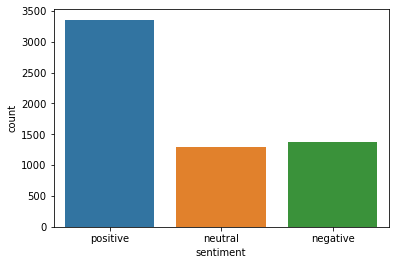

In [87]:
sns.countplot(data=df_concat, x = 'sentiment')

Now that we have everything let's save it for the next phase: EDA and Sentiment Analysis!

In [92]:
# saving in csv

df_concat.to_csv("../data/processed/tweets_data_for_sentiment_analysis_"+TodaysDate+".csv", date_format = "%Y-%m-%d %H-%m-%S")